In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('dataset.csv')

In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(303, 14)

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


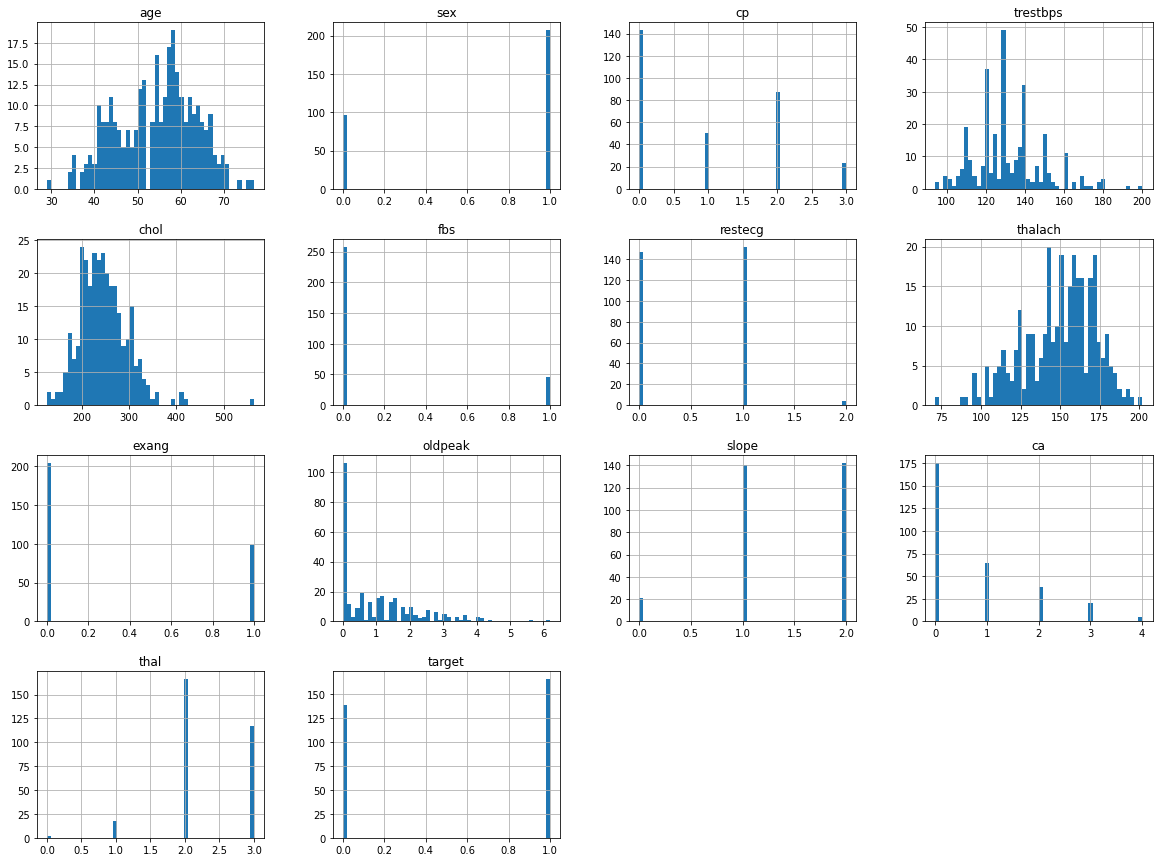

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()


In [13]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
 train_set0,test_set0 = split_train_test(data, 0.1)

In [15]:
 train_set0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1


In [16]:
test_set0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [17]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [18]:
def splitdata(data, test_ratio):
    ids = data.index
    in_test_set = pd.Series(ids).apply(lambda id_: test_set_check(id_, test_ratio))
    in_test_set = in_test_set.reset_index(drop=True)
    return data.loc[~in_test_set.values], data.loc[in_test_set.values]

In [19]:
train_set, test_set = splitdata(data, 0.1)

In [20]:
train_set.shape

(275, 14)

In [21]:
test_set.shape

(28, 14)

In [22]:
from sklearn.model_selection import train_test_split 
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [23]:
data["cholcat"] = pd.cut(data["chol"],
 bins=[0.,150., 250., 350., np.inf],
 labels=[1, 2, 3, 4])


<AxesSubplot:>

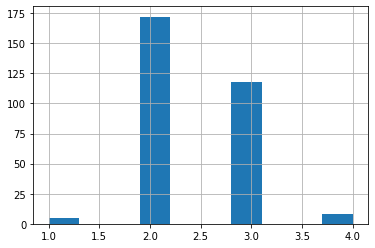

In [24]:
data["cholcat"].hist()

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
data_reset_index = data.reset_index(drop=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_reset_index, data_reset_index["cholcat"]):
    strat_train_set = data_reset_index.loc[train_index]
    strat_test_set = data_reset_index.loc[test_index]


In [26]:
data["cholcat"]

0      2
1      2
2      2
3      2
4      4
      ..
298    2
299    3
300    2
301    1
302    2
Name: cholcat, Length: 303, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [27]:
data["cholcat"].value_counts()/len(data["cholcat"])

2    0.567657
3    0.389439
4    0.026403
1    0.016502
Name: cholcat, dtype: float64

In [28]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("cholcat", axis=1, inplace=True)

In [29]:
chol=strat_train_set.copy()

In [30]:
chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1


<AxesSubplot:xlabel='chol', ylabel='trestbps'>

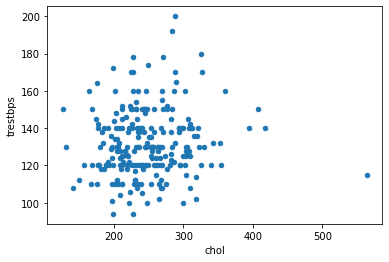

In [31]:
chol.plot(kind="scatter", x="chol", y="trestbps")

<AxesSubplot:xlabel='chol', ylabel='trestbps'>

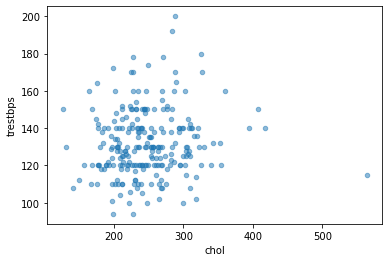

In [32]:
chol.plot(kind="scatter", x="chol", y="trestbps",alpha=0.5)

In [33]:
corr_matrix = data.corr()
corr_matrix["chol"].sort_values(ascending=False)

chol        1.000000
age         0.213678
trestbps    0.123174
thal        0.098803
ca          0.070511
exang       0.067023
oldpeak     0.053952
fbs         0.013294
slope      -0.004038
thalach    -0.009940
cp         -0.076904
target     -0.085239
restecg    -0.151040
sex        -0.197912
Name: chol, dtype: float64

array([[<AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalach', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='trestbps', ylabel='thalach'>,
        <AxesSubplot:xlabel='chol', ylabel='thalach'>,
        <AxesSubplot:xlabel='thalach', ylabel='thalach'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='thalach'>],
       [<AxesSubplot:xlabel='trestbps', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='chol', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='thalach', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='oldpeak'>]], dtype=object)

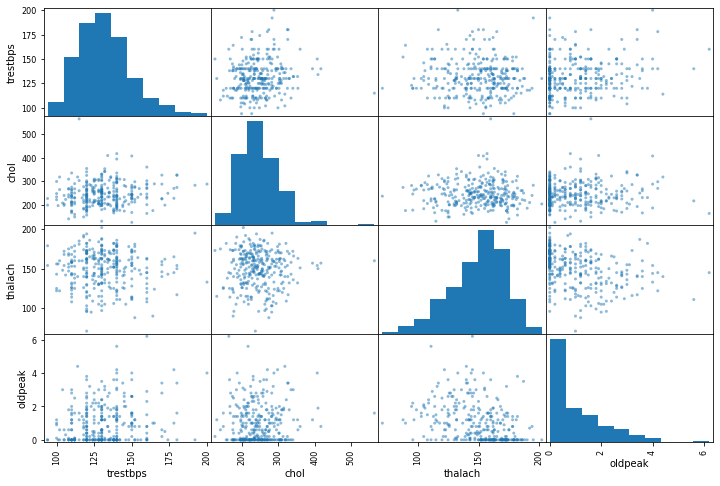

In [34]:
from pandas.plotting import scatter_matrix
attributes = ["trestbps", "chol", "thalach",
 "oldpeak"]
scatter_matrix(data[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='chol', ylabel='target'>

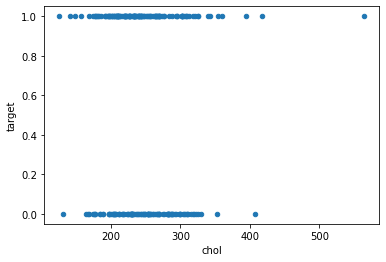

In [35]:
chol.plot(kind="scatter", x="chol", y="target")

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop("target", axis=1),data["target"],test_size=0.1, random_state = 42)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
log_model.predict(pd.DataFrame([[19, 1, 0, 110, 216, 0, 0, 70, 0, 0.2, 2, 1, 3, 0]],
                         columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'cholcat']))[0]

0

In [44]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cholcat
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,4
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,3
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,3


In [37]:
y_pred = log_model.predict(X_test)

In [38]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [39]:
y_test

179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
5      1
101    1
45     1
175    0
118    1
46     1
125    1
192    0
285    0
279    0
152    1
269    0
272    0
25     1
146    1
283    0
254    0
73     1
231    0
109    1
139    1
Name: target, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8064516129032258
